In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import style
style.use("ggplot")

from plotly.offline import init_notebook_mode, iplot
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
df=pd.read_csv(r"covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.shape

(8486, 9)

In [4]:
#checking null values the data set...
df.isnull().mean()*100

Sno                         0.0
Date                        0.0
Time                        0.0
State/UnionTerritory        0.0
ConfirmedIndianNational     0.0
ConfirmedForeignNational    0.0
Cured                       0.0
Deaths                      0.0
Confirmed                   0.0
dtype: float64

In [5]:
#serial no. not needed  and time also not needed beacsue we have date column available  
df.drop('Sno',axis =1,inplace=True)
df.drop('Time',axis =1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      8486 non-null   object
 1   State/UnionTerritory      8486 non-null   object
 2   ConfirmedIndianNational   8486 non-null   object
 3   ConfirmedForeignNational  8486 non-null   object
 4   Cured                     8486 non-null   int64 
 5   Deaths                    8486 non-null   int64 
 6   Confirmed                 8486 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 464.2+ KB


In [7]:
df['ConfirmedIndianNational'].value_counts()

-      8040
1       108
3        73
2        33
4        21
       ... 
127       1
86        1
71        1
52        1
125       1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [8]:
#dropping values where "-" is present..
df[df['ConfirmedIndianNational']=='-'].shape

(8040, 7)

### Here we know that in our ConfirmedIndianNational and ConfirmedForigenNational column have lots of  values are "-" so we dont need of these columns and we have already a column confirmed cases availble so dropping both of them..

In [9]:
df1=df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

## Adding a New Column Active  cases to know how many active  cases over there...

In [10]:
df1['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df1.head(40)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,30/01/20,Kerala,0,0,1,1
1,31/01/20,Kerala,0,0,1,1
2,01/02/20,Kerala,0,0,2,2
3,02/02/20,Kerala,0,0,3,3
4,03/02/20,Kerala,0,0,3,3
5,04/02/20,Kerala,0,0,3,3
6,05/02/20,Kerala,0,0,3,3
7,06/02/20,Kerala,0,0,3,3
8,07/02/20,Kerala,0,0,3,3
9,08/02/20,Kerala,0,0,3,3


In [11]:
#renaiming the State/UnionTerritory with State..
df1.rename(columns={"State/UnionTerritory":"State"},inplace=True)

In [12]:
df1.head()

,Date,State,Cured,Deaths,Confirmed,Active_cases
0,30/01/20,Kerala,0,0,1,1
1,31/01/20,Kerala,0,0,1,1
2,01/02/20,Kerala,0,0,2,2
3,02/02/20,Kerala,0,0,3,3
4,03/02/20,Kerala,0,0,3,3


In [13]:
#highlighting visualization of the top most numbers...  
df1.sort_values(by='Active_cases',ascending=False)[:100].style.background_gradient(cmap="Reds")

,Date,State,Cured,Deaths,Confirmed,Active_cases
6405,18/09/20,Maharashtra,812354,31351,1145840,302135
6440,19/09/20,Maharashtra,834432,31791,1167496,301273
6475,20/09/20,Maharashtra,857933,32216,1188015,297866
6370,17/09/20,Maharashtra,792832,30883,1121221,297506
6335,16/09/20,Maharashtra,775273,30409,1097856,292174
6300,15/09/20,Maharashtra,755850,29894,1077374,291630
6510,21/09/20,Maharashtra,884341,32671,1208642,291630
6265,14/09/20,Maharashtra,740061,29531,1060308,290716
6230,13/09/20,Maharashtra,728512,29115,1037765,280138
6650,25/09/20,Maharashtra,973214,34345,1282963,275404


In [21]:
df1[['Active_cases']].sort_values(by='Active_cases',ascending=False)[:100]

,Active_cases
6405,302135
6440,301273
6475,297866
6370,297506
6335,292174
...,...
4410,137282
7770,134657
4375,132538
7805,132069


In [22]:
df1[['Active_cases']].sort_values(by='Active_cases',ascending=False)[:100].style.background_gradient(cmap='Reds')

,Active_cases
6405,302135
6440,301273
6475,297866
6370,297506
6335,292174
6300,291630
6510,291630
6265,290716
6230,280138
6650,275404


# checking how many Total Active csases are happened till Date...

In [104]:
#Checking total active cases state wise... 
total_active_cases=df1.groupby('State')['Active_cases'].sum().sort_values(ascending=False).to_frame()
total_active_cases.style.background_gradient(cmap='Reds')

,Active_cases
State,
Maharashtra,26225950
Karnataka,10323368
Andhra Pradesh,7820113
Tamil Nadu,6979098
Kerala,5877485
Uttar Pradesh,5558149
Delhi,3962161
West Bengal,3674640
Telengana,2736580


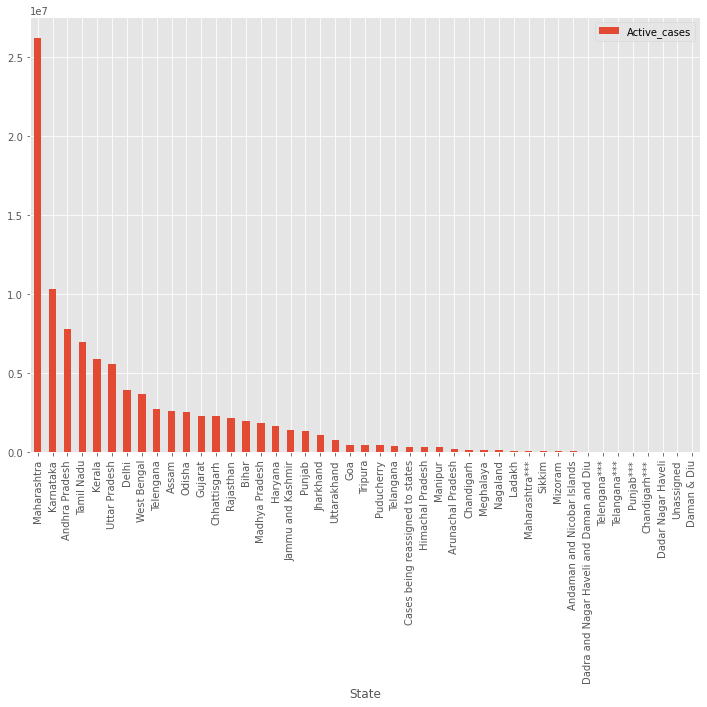

In [105]:
total_active_cases.plot(kind="bar")
plt.show()

In [173]:
# sns.barplot(x=total_active_cases.index,y=total_active_cases['Active_cases'])
# plt.xticks(rotation=90)
# plt.show()

In [144]:
fig=px.bar(total_active_cases,x=total_active_cases.index,y=total_active_cases['Active_cases'],
          color=total_active_cases.index,)
fig.update_layout(margin=dict(l=5,r=5,t=20,b=20))
fig.show()

In [172]:
# fig=go.Figure()
# fig.add_trace(go.Bar(x=total_active_cases.index,
#                      y=total_active_cases['Active_cases'],))
# fig.update_layout(xaxis_title='State',yaxis_title='State vise Total Active Cases',
#                  margin=dict(t=10,b=200),xaxis_title_font_size=30,xaxis_title_font_color='red')
# fig.show()

In [222]:
#checking top 50 dates of corona is on peak till date....
unique_dates_df=df1.drop_duplicates(subset='Date')
till_top_50dates=unique_dates_df.sort_values(by='Active_cases',ascending=False)[:50]
till_top_50dates.head()

,Date,State,Cured,Deaths,Confirmed,Active_cases
5231,16/08/20,Andaman and Nicobar Islands,1128,24,2306,1154
5266,17/08/20,Andaman and Nicobar Islands,1226,28,2399,1145
5196,15/08/20,Andaman and Nicobar Islands,1032,24,2186,1130
5161,14/08/20,Andaman and Nicobar Islands,924,22,2037,1091
5301,18/08/20,Andaman and Nicobar Islands,1325,29,2445,1091


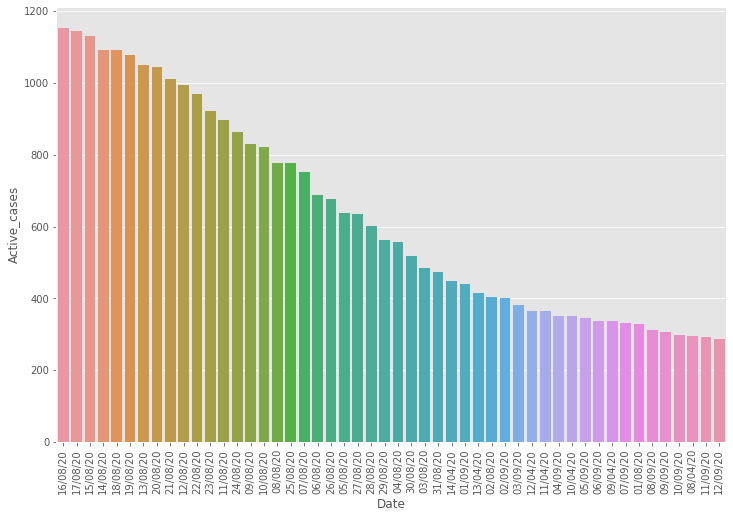

In [223]:
sns.barplot(x=till_top_50dates['Date'],y=till_top_50dates['Active_cases'])
plt.xticks(rotation=90)
plt.show()

In [226]:
#visualizing with the help  of plotly to know exact values of highest active cases ....
fig=px.bar(till_top_50dates,x=till_top_50dates['Date'],y=till_top_50dates['Active_cases'],
          color=till_top_50dates['Date'],hover_name=till_top_50dates['Active_cases'],)
fig.show()

# Taking top 10 cities which are most effective by the virus and trying to visualizing number of deaths,cured and active cases till date for comparing the pandamic effect state vise ...

In [232]:
top_10_cites=df1.groupby('State')['Active_cases'].sum().sort_values(ascending=False)[:10]
top_10_cites

State
Maharashtra       26225950
Karnataka         10323368
Andhra Pradesh     7820113
Tamil Nadu         6979098
Kerala             5877485
Uttar Pradesh      5558149
Delhi              3962161
West Bengal        3674640
Telengana          2736580
Assam              2619564
Name: Active_cases, dtype: int64

In [310]:
Maharashtra     =    df1[df1['State']=='Maharashtra'].sort_values(by='Date',ascending=False)[:50]
Karnataka       =df1[df1['State']=='Karnataka'].sort_values(by='Date',ascending=False)[:50]
AndhraPradesh    =df1[df1['State']=='Andhra Pradesh'].sort_values(by='Date',ascending=False)[:50]
TamilNadu       =df1[df1['State']=='Tamil Nadu'].sort_values(by='Date',ascending=False)[:50]
Kerala          =df1[df1['State']=='Kerala'].sort_values(by='Date',ascending=False)[:50]
UttarPradesh        =df1[df1['State']=='Uttar Pradesh'].sort_values(by='Date',ascending=False)[:50]
Delhi           =df1[df1['State']=='Delhi'].sort_values(by='Date',ascending=False)[:50]
WestBengal         =df1[df1['State']=='West Bengal'].sort_values(by='Date',ascending=False)[:50]
Telengana          =df1[df1['State']=='Telengana'].sort_values(by='Date',ascending=False)[:50]
Assam             =df1[df1['State']=='Assam'].sort_values(by='Date',ascending=False)[:50]

In [238]:
from plotly.subplots import make_subplots 

In [269]:
#comparing the states ....
fig=make_subplots(rows=5,cols=2,
                 specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}],
                        [{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]
                       ,[{'secondary_y':True},{'secondary_y':True}]],
                 subplot_titles=('Maharashtra','Karnataka','AndhraPradesh','TamilNadu','Kerala',
                         'UttarPradesh','Delhi','WestBengal','Telengana','Assam'))
fig.add_trace(go.Bar(x=maharashtra['Date'],y=Maharashtra['Active_cases']),1,1)
fig.add_trace(go.Bar(x=Karnataka['Date'],y=Karnataka['Active_cases']),1,2)
fig.add_trace(go.Bar(x=AndhraPradesh['Date'],y=AndhraPradesh['Active_cases']),2,1)
fig.add_trace(go.Bar(x=TamilNadu['Date'],y=TamilNadu['Active_cases']),2,2)
fig.add_trace(go.Bar(x=Kerala['Date'],y=Kerala['Active_cases']),3,1)
fig.add_trace(go.Bar(x=UttarPradesh['Date'],y=UttarPradesh['Active_cases']),3,2)
fig.add_trace(go.Bar(x=Delhi['Date'],y=Delhi['Active_cases']),4,1)
fig.add_trace(go.Bar(x=WestBengal['Date'],y=WestBengal['Active_cases']),4,2)
fig.add_trace(go.Bar(x=Telengana['Date'],y=Telengana['Active_cases']),5,1)
fig.add_trace(go.Bar(x=Assam['Date'],y=Assam['Active_cases']),5,2)

fig.update_layout(height=1600)
fig.show()


In [352]:
# def plot_graph(data,x,y):
#     fig=make_subplots(rows=10,cols=1)
#     for i in range(10):
#         fig.add_trace(go.Bar(x=data['Date'],y=data['Active_cases']),i+1,1)
#     fig.update_layout(height=1600)
#     fig.show()

In [354]:
# plot_graph(data=Maharashtra,x='Date',y='Active_cases')

# Visualising comparrision  of Deaths, Cured and Confirmed cases of  top 5 state which are most effected by the Covid

In [361]:
#maharashtra,
m=df1.query('State=="Maharashtra"')
m


,Date,State,Cured,Deaths,Confirmed,Active_cases
76,09/03/20,Maharashtra,0,0,2,2
91,10/03/20,Maharashtra,0,0,5,5
97,11/03/20,Maharashtra,0,0,2,2
120,12/03/20,Maharashtra,0,0,11,11
133,13/03/20,Maharashtra,0,0,14,14
...,...,...,...,...,...,...
8330,12/11/20,Maharashtra,1597255,45560,1731833,89018
8365,13/11/20,Maharashtra,1605064,45682,1736329,85583
8400,14/11/20,Maharashtra,1609607,45809,1740461,85045
8435,15/11/20,Maharashtra,1612314,45914,1744698,86470


In [393]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=m['Date'],y=m['Confirmed'],
                        name="Confirmed",mode="lines+markers",line=dict(color='blue',width=1)))
fig.add_trace(go.Scatter(x=m['Date'],y=m['Cured'],name='Cured',mode="lines+markers",
                        line=dict(color='green',width=1)))
fig.add_trace(go.Scatter(x=m['Date'],y=m['Deaths'],name='Cured',mode="lines+markers",
                        line=dict(color='red',width=1)))
fig.show()

In [394]:
#Karnataka,
k=df1.query('State=="Karnataka"')
k

,Date,State,Cured,Deaths,Confirmed,Active_cases
74,09/03/20,Karnataka,0,0,1,1
89,10/03/20,Karnataka,0,0,4,4
108,11/03/20,Karnataka,0,0,4,4
119,12/03/20,Karnataka,0,0,4,4
132,13/03/20,Karnataka,0,1,6,5
...,...,...,...,...,...,...
8326,12/11/20,Karnataka,811581,11453,853796,30762
8361,13/11/20,Karnataka,814949,11474,855912,29489
8396,14/11/20,Karnataka,818392,11491,857928,28045
8431,15/11/20,Karnataka,820590,11508,860082,27984


In [395]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=k['Date'],y=k['Confirmed'],
                        name="Confirmed",mode="lines+markers",line=dict(color='blue',width=1)))
fig.add_trace(go.Scatter(x=k['Date'],y=k['Cured'],name='Cured',mode="lines+markers",
                        line=dict(color='green',width=1)))
fig.add_trace(go.Scatter(x=k['Date'],y=k['Deaths'],name='Cured',mode="lines+markers",
                        line=dict(color='red',width=1)))
fig.show()

In [438]:
#function for plotting graph for every state...
def scatter_plot(data,states):
    for x in states:
        st=data[data['State']==x]
        fig=go.Figure()
        fig.add_trace(go.Scatter(x=st['Date'],y=st['Confirmed'],
                                name='Confirmed',mode="lines+markers",
                                line=dict(color='blue',width=1)))
        fig.add_trace(go.Scatter(x=st['Date'],y=st['Cured'],
                                name='Cured',mode="lines+markers",
                                line=dict(color='green',width=1)))
        fig.add_trace(go.Scatter(x=st['Date'],y=st['Deaths'],
                                name='Deaths',mode="lines+markers",
                                line=dict(color='red',width=1)))
        fig.update_layout(title=x,height=400)
        fig.show()
        
        
        
    


In [439]:
scatter_plot(df1,state)

# Thank You